## USDCAD Price prediction using Facebook Prophet

## Importing Necessary Libraries

In [1]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [2]:
import pandas as pd
# Set the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from prophet import Prophet
import plotly.express as px
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#This task is for colab only
#Initializing Plotly
# import plotly.io as pio
# pio.renderers.default = 'colab'


## Importing the Dataset & Exploring it

# Download Data from Y Finance

In [4]:
# Download ^GSPC data from Yahoo Finance for s & p 500
# ticker = '^GSPC'
# Download CAD=X data from Yahoo Finance
ticker = 'CAD=X'
data = yf.download(ticker, period="1mo", interval="1h")
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2023-10-06 13:00:00,1.37171,1.37450,1.36950,1.37139,1.37139,0
2023-10-06 14:00:00,1.37142,1.37260,1.36790,1.37143,1.37143,0
2023-10-06 15:00:00,1.37138,1.37295,1.36980,1.37131,1.37131,0
2023-10-06 16:00:00,1.37131,1.37152,1.36700,1.36754,1.36754,0
2023-10-06 16:29:31,1.36766,1.36766,1.36766,1.36766,1.36766,0


# Upload data from csv

In [5]:
# column_names = ['Date', 'Hour', 'Open', 'High', 'Low', 'Close', 'Volume']

# # read the data into a pandas dataframe from csv file
# data = pd.read_csv('USDCAD60.csv', names=column_names)
# data.tail()

In [6]:
# drop all columns except Close
data = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
data.tail()

,Close
2023-10-06 13:00:00,1.37139
2023-10-06 14:00:00,1.37143
2023-10-06 15:00:00,1.37131
2023-10-06 16:00:00,1.36754
2023-10-06 16:29:31,1.36766


In [7]:
# reset the index
data = data.reset_index()

In [8]:
#note for fbprophet the price data must be a float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   527 non-null    datetime64[ns]
 1   Close   527 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.4 KB


In [9]:
data.describe()

,Close
count,527.000000
mean,1.356222
std,0.009507
min,1.339910
25%,1.348665
50%,1.352900
75%,1.364860
max,1.378350


# Data Visualization

In [10]:
# list of columns
data.columns

Index(['index', 'Close'], dtype='object')

In [11]:
# Area graph (Date Vs Price) using Plotly Express
px.area(data, x='index', y="Close")

In [12]:
# Violin plot using Plotly Express
px.violin(data, y="Close")

# Creating Facebook Prophet Model

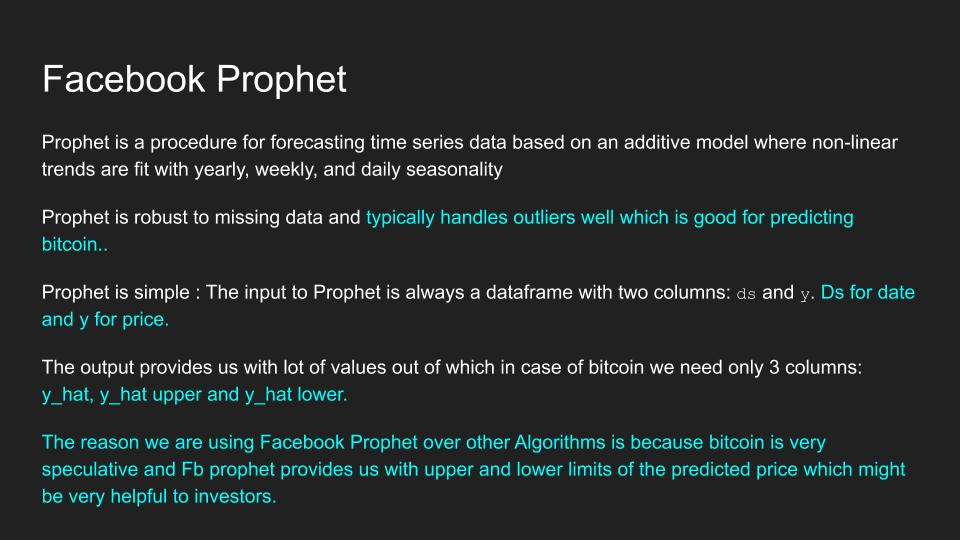

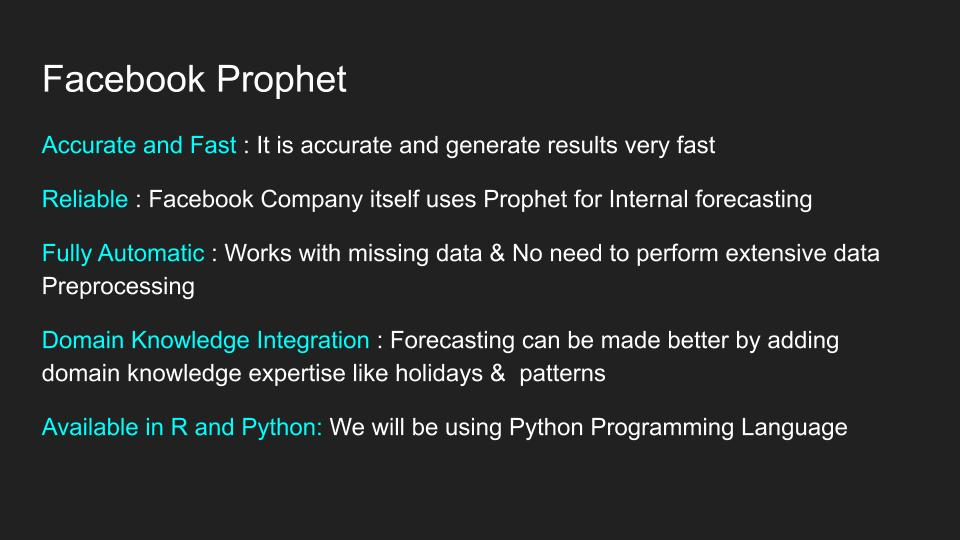

## Data Preperation

In [13]:
#  double check the columns

data.columns

Index(['index', 'Close'], dtype='object')

In [14]:
# rename the columns
prophet_df = data.rename(columns={'index':"ds", 'Close':'y'})

In [15]:
prophet_df.tail()

,ds,y
522,2023-10-06 13:00:00,1.37139
523,2023-10-06 14:00:00,1.37143
524,2023-10-06 15:00:00,1.37131
525,2023-10-06 16:00:00,1.36754
526,2023-10-06 16:29:31,1.36766


## Modelling

In [16]:
m = Prophet()
m.fit(prophet_df)

08:29:33 - cmdstanpy - INFO - Chain [1] start processing
08:29:33 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

In [17]:
future = m.make_future_dataframe(periods=14, freq='H')
forecast = m.predict(future)

In [18]:
# check the forecast data
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
536,2023-10-07 02:29:31,1.379201,1.376407,1.380628,1.378711,1.379537,-0.000671,-0.000671,-0.000671,0.000190,0.000190,0.000190,-0.000861,-0.000861,-0.000861,0.0,0.0,0.0,1.378530
537,2023-10-07 03:29:31,1.379331,1.377117,1.381450,1.378684,1.379830,-0.000144,-0.000144,-0.000144,0.000150,0.000150,0.000150,-0.000294,-0.000294,-0.000294,0.0,0.0,0.0,1.379187
538,2023-10-07 04:29:31,1.379461,1.377426,1.382146,1.378705,1.380090,0.000372,0.000372,0.000372,0.000097,0.000097,0.000097,0.000274,0.000274,0.000274,0.0,0.0,0.0,1.379833
539,2023-10-07 05:29:31,1.379591,1.378146,1.382922,1.378602,1.380337,0.000932,0.000932,0.000932,0.000091,0.000091,0.000091,0.000840,0.000840,0.000840,0.0,0.0,0.0,1.380522
540,2023-10-07 06:29:31,1.379721,1.378669,1.383506,1.378544,1.380669,0.001523,0.001523,0.001523,0.000125,0.000125,0.000125,0.001398,0.001398,0.001398,0.0,0.0,0.0,1.381244


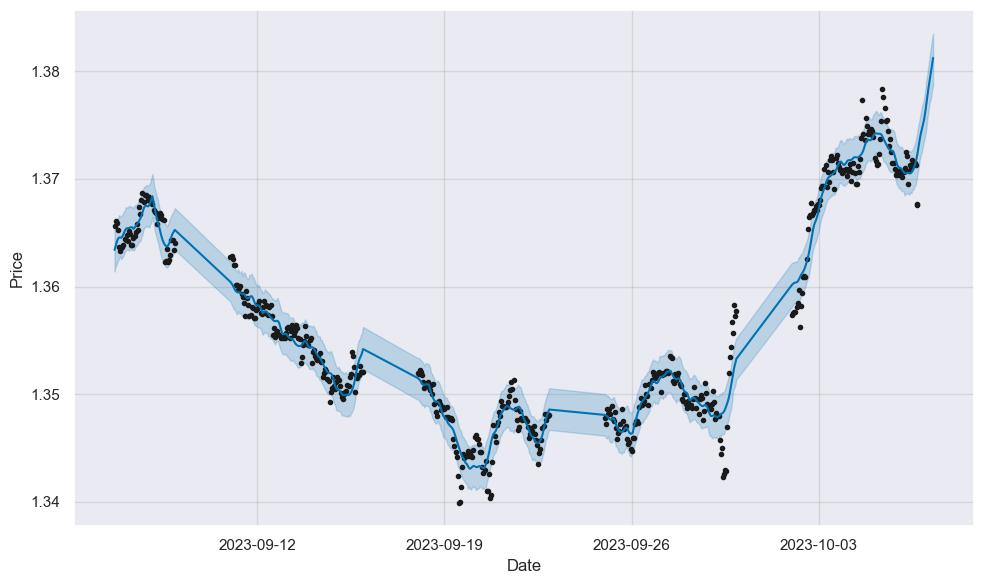

In [19]:
# plot the forecast data using prophets plot function
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

In [20]:
# only the components for the daily forecasting
# figure2 = m.plot_components(forecast)

## Downloading the Forecast data

In [21]:
data.to_csv("data.csv")
forecast.to_csv("forecast.csv")

# for google colab only
# from google.colab import files
# files.download("forecast.csv")

In [22]:
# TODO filter the forcast data to have just the date, yhat, yhat_lower, yhat_upper columns
#  add the forecast data to the original data
#  plot the original data and the forecast data
#  add the 10 sma and 50 sma to the plot. Base the 10 and 50 sma off the predicted prices (y hat) 

In [23]:
forecast_copy = forecast.copy()

In [24]:
forecast_copy = forecast_copy[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_copy.tail()

,ds,yhat,yhat_lower,yhat_upper
536,2023-10-07 02:29:31,1.378530,1.376407,1.380628
537,2023-10-07 03:29:31,1.379187,1.377117,1.381450
538,2023-10-07 04:29:31,1.379833,1.377426,1.382146
539,2023-10-07 05:29:31,1.380522,1.378146,1.382922
540,2023-10-07 06:29:31,1.381244,1.378669,1.383506


In [25]:
data_copy = data.copy()
data_copy.tail()

,index,Close
522,2023-10-06 13:00:00,1.37139
523,2023-10-06 14:00:00,1.37143
524,2023-10-06 15:00:00,1.37131
525,2023-10-06 16:00:00,1.36754
526,2023-10-06 16:29:31,1.36766


In [26]:
#  drop the date column

data_copy = data_copy.drop(['index'], axis=1)
data_copy.tail()

,Close
522,1.37139
523,1.37143
524,1.37131
525,1.36754
526,1.36766


In [27]:
# add the data to the forecast data

forecast_copy = pd.concat([data_copy, forecast_copy], axis=1)

forecast_copy.tail()

,Close,ds,yhat,yhat_lower,yhat_upper
536,NaN,2023-10-07 02:29:31,1.378530,1.376407,1.380628
537,NaN,2023-10-07 03:29:31,1.379187,1.377117,1.381450
538,NaN,2023-10-07 04:29:31,1.379833,1.377426,1.382146
539,NaN,2023-10-07 05:29:31,1.380522,1.378146,1.382922
540,NaN,2023-10-07 06:29:31,1.381244,1.378669,1.383506


In [28]:
# add the 10 sma and 50 sma to the plot. Base the 10 and 50 sma off the predicted prices (y hat)

# 10 sma
forecast_copy['10sma'] = forecast_copy['yhat'].rolling(window=10).mean()

# 50 sma
forecast_copy['50sma'] = forecast_copy['yhat'].rolling(window=50).mean()

forecast_copy.tail()

,Close,ds,yhat,yhat_lower,yhat_upper,10sma,50sma
536,NaN,2023-10-07 02:29:31,1.378530,1.376407,1.380628,1.375557,1.372846
537,NaN,2023-10-07 03:29:31,1.379187,1.377117,1.381450,1.376176,1.372946
538,NaN,2023-10-07 04:29:31,1.379833,1.377426,1.382146,1.376795,1.373058
539,NaN,2023-10-07 05:29:31,1.380522,1.378146,1.382922,1.377427,1.373184
540,NaN,2023-10-07 06:29:31,1.381244,1.378669,1.383506,1.378088,1.373325


In [29]:
# Slice the data in half
half_data = forecast_copy.iloc[len(data)//2:]

half_data.describe()

,Close,yhat,yhat_lower,yhat_upper,10sma,50sma
count,264.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,1.357883,1.358861,1.356893,1.360828,1.358364,1.356436
std,0.011038,0.011356,0.011349,0.011368,0.011078,0.010303
min,1.342300,1.345477,1.343530,1.347468,1.345746,1.345551
25%,1.348200,1.348456,1.346509,1.350453,1.348423,1.347597
50%,1.351945,1.351785,1.349753,1.353696,1.351636,1.350584
75%,1.370633,1.371277,1.369348,1.373219,1.371138,1.368542
max,1.378350,1.381244,1.378669,1.383506,1.378088,1.373325


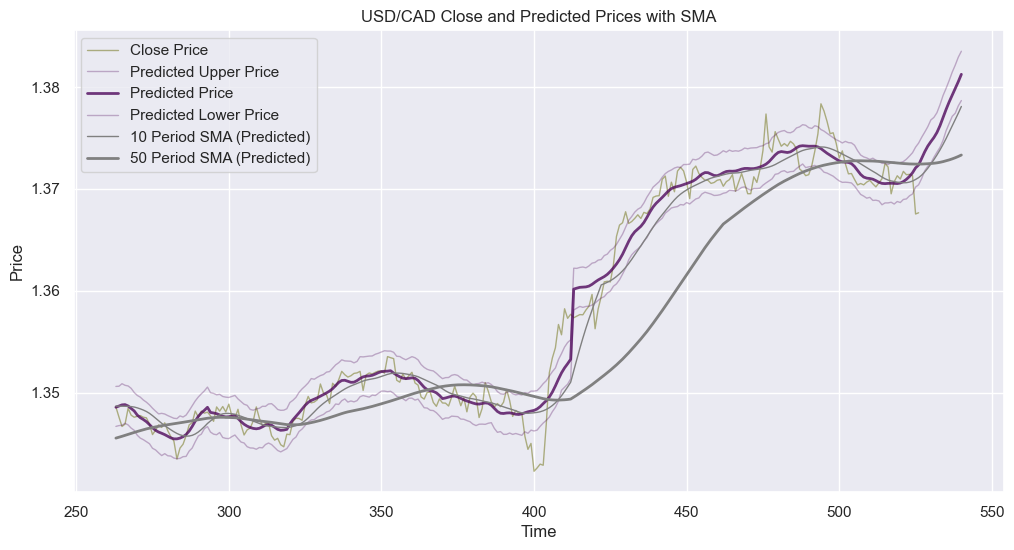

In [30]:
# Slice the data in half
half_data = forecast_copy.iloc[len(data)//2:]

# Plot the 'Close', 'yhat', 10 SMA and 50 SMA on the same chart
plt.figure(figsize=(12,6))
plt.plot(half_data['Close'], label='Close Price', linewidth=1, color='#6c6e0d', alpha=0.5)
plt.plot(half_data['yhat_upper'], label='Predicted Upper Price', linewidth=1, color='#4f095c', alpha=0.3)
plt.plot(half_data['yhat'], label='Predicted Price', linewidth=2, color='#4f095c', alpha=0.8)
plt.plot(half_data['yhat_lower'], label='Predicted Lower Price', linewidth=1, color='#4f095c', alpha=0.3)
plt.plot(half_data['10sma'], label='10 Period SMA (Predicted)', linewidth=1, color='gray')
plt.plot(half_data['50sma'], label='50 Period SMA (Predicted)', linewidth=2, color='gray')
plt.title('USD/CAD Close and Predicted Prices with SMA')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
# create an interactive chart using ploty express

import plotly.express as px
import plotly.graph_objects as go

# Create the main line chart using 'Close' column
fig = px.line(half_data, x=half_data.index, y='Close', labels={'Close': 'Close Price'}, line_shape='linear')

# Add other lines to the chart using the add_trace method
fig.add_trace(go.Scatter(x=half_data.index, y=half_data['yhat_upper'], mode='lines', name='Predicted Upper Price', line=dict(width=1, color='#4f095c', dash='solid')))
fig.add_trace(go.Scatter(x=half_data.index, y=half_data['yhat'], mode='lines', name='Predicted Price', line=dict(width=2, color='#4f095c', dash='solid')))
fig.add_trace(go.Scatter(x=half_data.index, y=half_data['yhat_lower'], mode='lines', name='Predicted Lower Price', line=dict(width=1, color='#4f095c', dash='solid')))
fig.add_trace(go.Scatter(x=half_data.index, y=half_data['10sma'], mode='lines', name='10 Period SMA (Predicted)', line=dict(width=1, color='gray', dash='solid')))
fig.add_trace(go.Scatter(x=half_data.index, y=half_data['50sma'], mode='lines', name='50 Period SMA (Predicted)', line=dict(width=2, color='gray', dash='solid')))

# Set chart's title, x-axis label, and y-axis label
fig.update_layout(title='USD/CAD Close and Predicted Prices with SMA', xaxis_title='Time', yaxis_title='Price', width=1200, height=750)
# Customize the appearance of the 'Close' line
fig.update_traces(line=dict(width=1, color='#6c6e0d'), opacity=0.3, selector=dict(name='Close Price'))

# Show the chart
fig.show()


# build this chart for usdcad and all other usd pairs and s and p 

fig, ax = plt.subplots(2, 1)
ax[0].plot(amazon["date"], amazon["open"], color='b')
ax[0].plot(amazon["date"], amazon["close"], color='r', linestyle='--')
ax[1].plot(google["date"], google["open"], color='b')
ax[1].plot(google["date"], google["close"], color='r', linestyle='--')
ax[0].set_ylabel("Amazon stock price 2013")
ax[1].set_ylabel("Google stock price 2013")
ax[1].set_xlabel("Date")
plt.show()

In [32]:
import pandas as pd
import yfinance as yf

ticker = 'CAD=X'
data = yf.download(ticker, period="max", interval="1d")
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-29,1.34910,1.35382,1.34173,1.34910,1.34910,0
2023-10-02,1.35737,1.36750,1.35620,1.35737,1.35737,0
2023-10-03,1.36763,1.37346,1.36780,1.36763,1.36763,0
2023-10-04,1.37091,1.37779,1.36913,1.37091,1.37091,0
2023-10-05,1.37442,1.37839,1.37090,1.37442,1.37442,0


In [33]:
#  drop all columns except Open and Close

data = data.drop(['High', 'Low', 'Adj Close', 'Volume'], axis=1) 
data.tail()   

,Open,Close
Date,,
2023-09-29,1.34910,1.34910
2023-10-02,1.35737,1.35737
2023-10-03,1.36763,1.36763
2023-10-04,1.37091,1.37091
2023-10-05,1.37442,1.37442


In [34]:
#  query for the last month of data

data_query = data.query('Date >= "2023-06-30"')
data_query

,Open,Close
Date,,
2023-06-30,1.32500,1.32500
2023-07-03,1.32500,1.32500
2023-07-04,1.32480,1.32480
2023-07-05,1.32235,1.32235
2023-07-06,1.32859,1.32859
2023-07-07,1.33654,1.33654
2023-07-10,1.32780,1.32780
2023-07-11,1.32740,1.32740
2023-07-12,1.32277,1.32277


In [35]:
#  plot using matplot lib
import matplotlib.pyplot as plt


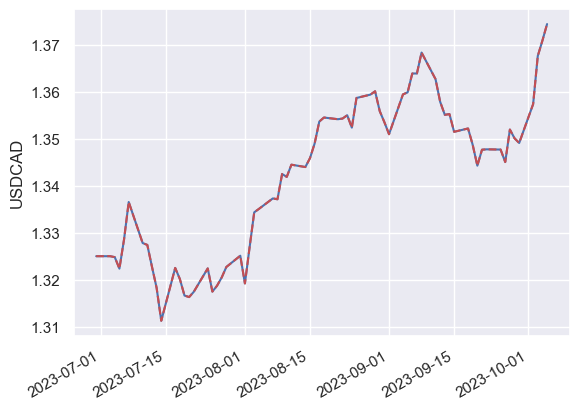

In [36]:
fig, ax = plt.subplots()
ax.plot(data_query.index, data_query["Open"], color='b')
ax.plot(data_query.index, data_query["Close"], color='r', linestyle='--')
# ax[1].plot(google["date"], google["open"], color='b')
# ax[1].plot(google["date"], google["close"], color='r', linestyle='--')
ax.set_ylabel("USDCAD")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# ax[1].set_ylabel("Google stock price 2013")
# ax[1].set_xlabel("Date")
plt.show()